### Step1 : Access data and perform Exploratory Data Analysis (EDA)
    Univariate Analysis
    Bi-variate Analysis
    Multi-variate Analysis

### Step2 : Pre-processing Steps
    2.1 Filling the missing values : Categorical with Mode and Continous with Mean
    2.2 Converting categories to numbers
    2.3 Bring all the variables in range 0 to 1

### Step 3 : Segregate the data into Features(X) and Target(y) and later perform Train, Validation & Test splits

### Step 4 : Try Multiple algorithms of Machine Learning for Select the champion(best) model.
    4.1 : Create a Model with Decision Tree and Prune the classification tree with Hyperparameter Tunning
    4.2 : Create a Model with Logistic Regression and perform Hyperparameter Tunning
    4.3 : Create a Model with SVM and perform Hyperparameter Tunning
    4.4 : Create a Model with Random Forest and perform Hyperparameter Tunning
    4.5 : Create a Model with Extreme Gradient Boosting (XGBoost) Model and perform Hyperparameter Tunning

### Step 5 (Summary) : Compare model results and final model selection

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Step1 : Access data and perform Exploratory Data Analysis (EDA)

In [1]:
# importing required libraries for data access, preprocessing & visulaization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the loan prediction data
loan = pd.read_csv('loan_data.csv')

In [3]:
# looking at the last 7 rows of the data
loan.tail(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
# shape of the data (Count of Rows & Columns)
loan.shape

(614, 13)

In [5]:
# checking missing values for each column
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Basic information about the data-set (Column-Name, count of not-null rows for each column and Data-Type )
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#generate descriptive statistics for continuous variable
loan.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [8]:
#generate descriptive statistics for categorical variable
loan.select_dtypes(include='object').describe().T

,count,unique,top,freq
Loan_ID,614,614,LP001116,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


##### Univariate Analysis

In [9]:
#Distribution of Target Variable
loan.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

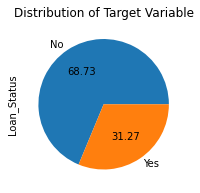

In [10]:
plt.figure(figsize = (3,3))
loan.Loan_Status.value_counts(normalize = True).plot.pie(autopct = '%.2f',
                                        labels = ['No', 'Yes'],
                                        title = 'Distribution of Target Variable');

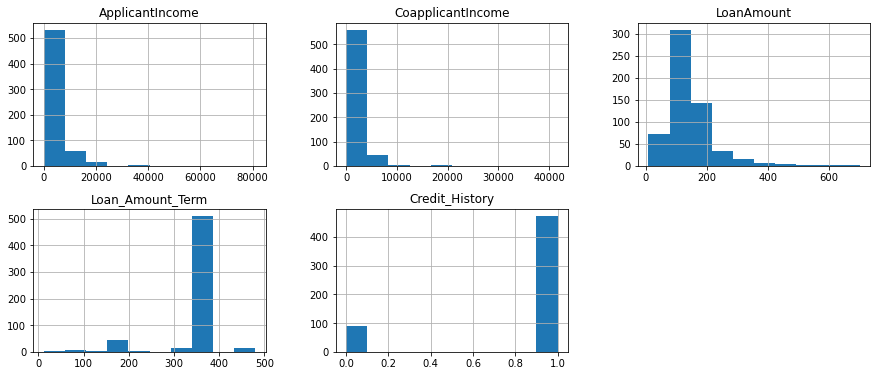

In [11]:
#generate histogram of all contionous variables
loan.hist(figsize=(15,30),layout=(9,3));

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


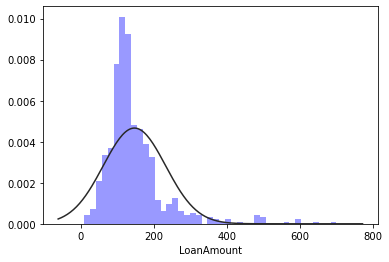

In [12]:
import scipy
ax = sns.distplot(loan.LoanAmount,fit=scipy.stats.norm, kde=False, hist=True, color='b');

In [13]:
## Plotting a Kernel Density Estimate (KDE)
#A kernel density estimation (KDE) is a way to estimate the probability density function (PDF) 
#of the random variable that “underlies” our sample. KDE is a means of data smoothing.

#sns.histplot(data=loan, x="LoanAmount", kde=True, color='b');

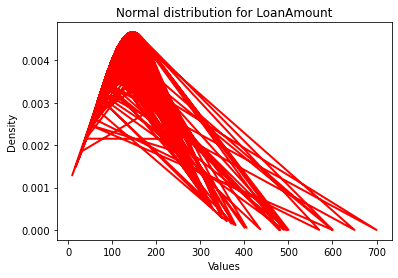

In [14]:
from scipy.stats import norm

# Get the mean and standard deviation of column A
mean_A, std_A = loan['LoanAmount'].mean(), loan['LoanAmount'].std()

# Create a normal distribution curve using the mean and standard deviation of column
y = norm.pdf(loan['LoanAmount'], mean_A, std_A)

# Plot the normal distribution curve over the histogram
plt.plot(loan['LoanAmount'], y, 'r', linewidth=2)

# Set the plot title and labels
plt.title('Normal distribution for LoanAmount')
plt.xlabel('Values')
plt.ylabel('Density')

# Show the plot
plt.show()

##### Bi-variate Analysis

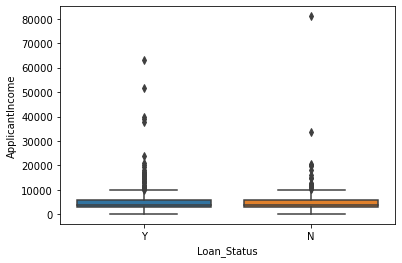

In [15]:
ax = sns.boxplot(data = loan, x = 'Loan_Status', y = 'ApplicantIncome')

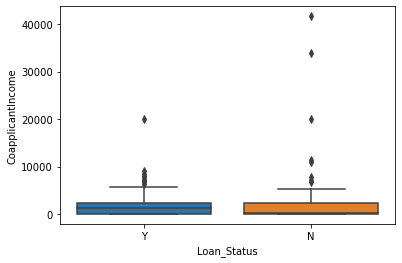

In [16]:
ax = sns.boxplot(data = loan, x = 'Loan_Status', y = 'CoapplicantIncome')

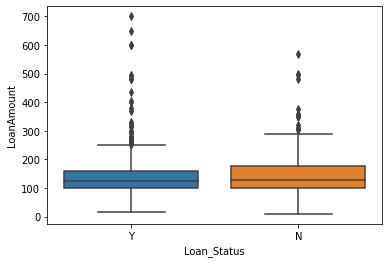

In [17]:
ax = sns.boxplot(data = loan, x = 'Loan_Status', y = 'LoanAmount')

##### Crosstabulation of 'Gender' with Target variable - 'Loan_Status'

In [18]:
gender_group = pd.crosstab(index = loan['Gender'], columns = loan['Loan_Status'], normalize="columns")
gender_group

Loan_Status,N,Y
Gender,,
Female,0.197861,0.181159
Male,0.802139,0.818841


<Figure size 1008x360 with 0 Axes>

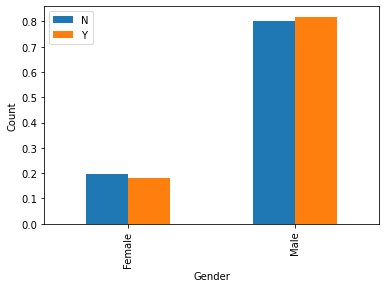

In [19]:
plt.figure(figsize=(14,5))
gender_group.plot.bar()
plt.ylabel("Count")
plt.legend();

##### Crosstabulation of 'Married' with Target variable - 'Loan_Status'

In [20]:
Married_group = pd.crosstab(index = loan['Married'], columns = loan['Loan_Status'], normalize = 'columns')
Married_group

Loan_Status,N,Y
Married,,
No,0.411458,0.319809
Yes,0.588542,0.680191


<Figure size 1008x360 with 0 Axes>

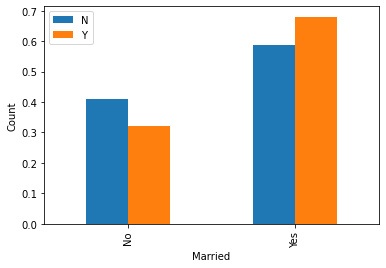

In [21]:
plt.figure(figsize=(14,5))
Married_group.plot.bar()
plt.ylabel("Count")
plt.legend();

##### Crosstabulation of 'Dependents' with Target variable - 'Loan_Status'

In [22]:
Dependents_group = pd.crosstab(index = loan['Dependents'], columns = loan['Loan_Status'], normalize = 'columns')
Dependents_group

Loan_Status,N,Y
Dependents,,
0,0.575269,0.576271
1,0.193548,0.159806
2,0.134409,0.184019
3+,0.096774,0.079903


<Figure size 1008x360 with 0 Axes>

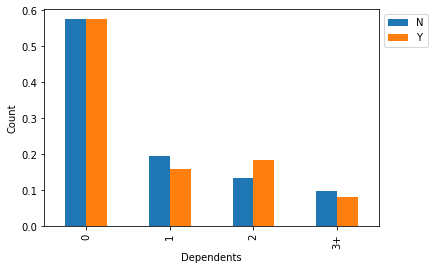

In [23]:
plt.figure(figsize=(14,5))
Dependents_group.plot.bar()
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1,1), loc='upper left');

##### Crosstabulation of 'Education' with Target variable - 'Loan_Status'

In [24]:
Education_group = pd.crosstab(index = loan['Education'], columns = loan['Loan_Status'], normalize = 'columns')
Education_group

Loan_Status,N,Y
Education,,
Graduate,0.729167,0.805687
Not Graduate,0.270833,0.194313


<Figure size 1008x360 with 0 Axes>

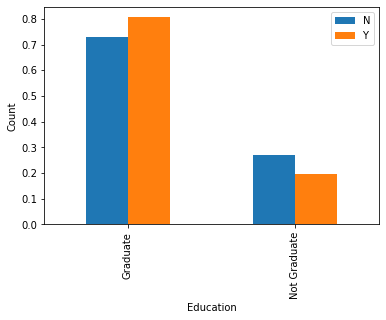

In [25]:
plt.figure(figsize=(14,5))
Education_group.plot.bar()
plt.ylabel("Count")
plt.legend();

In [26]:
Self_Employed_group = pd.crosstab(index = loan['Self_Employed'], columns = loan['Loan_Status'], normalize = 'columns')
Self_Employed_group

Loan_Status,N,Y
Self_Employed,,
No,0.857923,0.859649
Yes,0.142077,0.140351


In [27]:
Property_Area_group = pd.crosstab(index = loan['Property_Area'], columns = loan['Loan_Status'], normalize = 'columns')
Property_Area_group

Loan_Status,N,Y
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


<Figure size 1008x360 with 0 Axes>

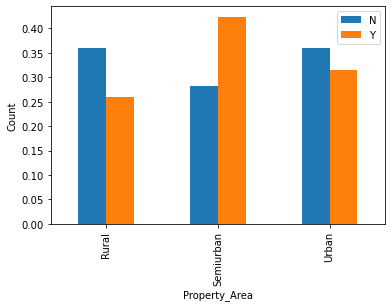

In [28]:
plt.figure(figsize=(14,5))
Property_Area_group.plot.bar()
plt.ylabel("Count")
plt.legend();

##### Multi-variate Analysis

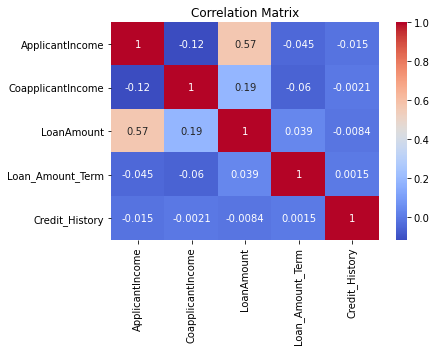

In [29]:
# Calculate the correlation matrix
corr_matrix = loan.corr()

# Create a heatmap using seaborn to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix');

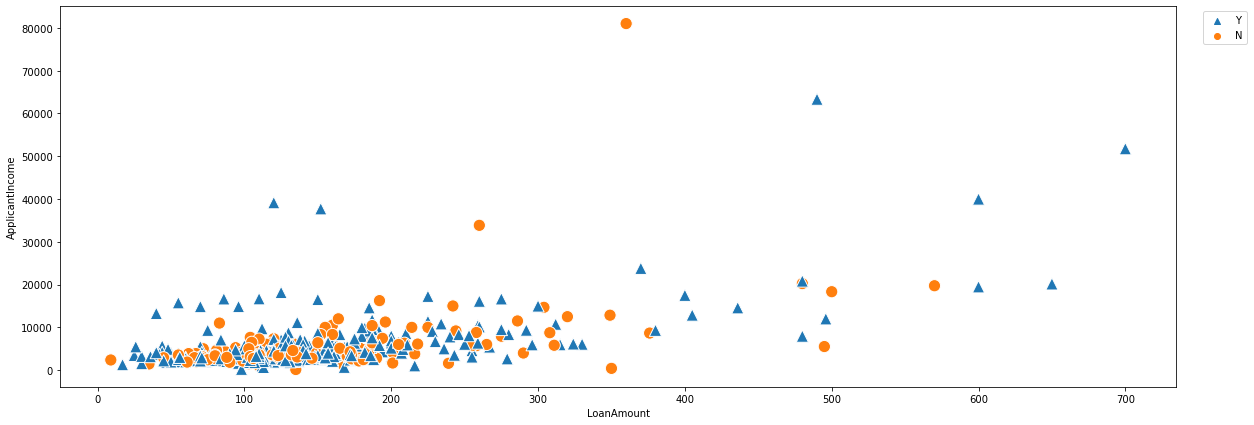

In [30]:
plt.figure(figsize = (20,7))
ax = sns.scatterplot(data = loan, x = 'LoanAmount', y = 'ApplicantIncome',
                    hue = 'Loan_Status',
                    style = 'Loan_Status',
                    markers = ['^','o'],
                    s = 150
                    )
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left');

### Step2 : Pre-processing Steps

<ol>2.1 Filling the missing values : Categorical with Mode and Continous with Mean</ol>
<ol>2.2 Converting categories to numbers</ol>
<ol>2.3 Bring all the variables in range 0 to 1</ol>

#### 2.1 Filling the missing values

##### Categorical Data: Mode

In [31]:
# filling missing values of categorical variables with mode

loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)

loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)

loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)

loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)

loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)

loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)

##### Continuous Data: Mean

In [32]:
# filling missing values of continuous variables with mean
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace=True)

In [33]:
# checking missing values after imputation
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### 2.2 Converting categories-string-values to numberic values

In [34]:
# converting the categories into numbers using map function
loan['Gender'] = loan['Gender'].map({'Male': 0, 'Female': 1})
loan['Married'] = loan['Married'].map({'No': 0, 'Yes': 1})
loan['Dependents'] = loan['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
loan['Education'] = loan['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan['Self_Employed'] = loan['Self_Employed'].map({'No': 0, 'Yes': 1})
loan['Property_Area'] = loan['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
loan['Loan_Status'] = loan['Loan_Status'].map({'N': 0, 'Y': 1})

In [35]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


#### 2.3 Bringing all the variables in range 0 to 1

<img src='https://drive.google.com/uc?id=1Z7wN2BE8CDSYIJly5l0K9uqYdj9WUo3f'>

In [36]:
# bringing variables in the range 0 to 1
loan['Dependents']=(loan['Dependents']-loan['Dependents'].min())/(loan['Dependents'].max()-loan['Dependents'].min())

In [37]:
# applying for loop to bring all the variables in range 0 to 1
for i in loan.columns[1:]:
    loan[i] = (loan[i] - loan[i].min()) / (loan[i].max() - loan[i].min())

In [38]:
# Droping the additional variable - Loan_ID
loan.drop('Loan_ID', axis = 1, inplace = True)

In [39]:
# again looking at first five rows of post-processed data
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


### Step 3 : Segregate the data into Features(X) and Target(y) and later perform Train, Validation & Test splits

In [40]:
# Segregate the data into Features(X) and Target(y)
X = loan.drop('Loan_Status',  axis = 1)
y = loan['Loan_Status']
X.shape, y.shape

((614, 11), (614,))

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 1234, stratify = y_test)

In [42]:
for i in [X_train, X_val, X_test, y_train, y_val, y_test]:
    print(i.shape)

(429, 11)
(92, 11)
(93, 11)
(429,)
(92,)
(93,)


### Step 4 : Try Multiple algorithms of Machine Learning and Select the champion(best) model

#### Step 4.1 : Create a Model with Decision Tree and Prune the classification tree with Hyperparameter Tunning

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 1234)
DT_model = DT.fit(X_train, y_train)

In [44]:
DT_model.score(X_train, y_train)

1.0

In [45]:
DT_model.score(X_val, y_val)

0.6956521739130435

In [46]:
DT_model.score(X_test, y_test)

0.6129032258064516

##### Prune the classification tree with Hyperparameter Tunning

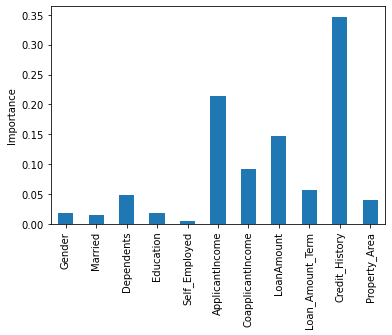

In [47]:
importance = DT_model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

In [48]:
grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': range(1, 7)}

In [49]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
DT_CV = GridSearchCV(estimator = classifier, param_grid = grid)
DT_CV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1234,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5],
                       

In [50]:
DT_CV.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [51]:
DT_CV_model = DT_CV.fit(X_train, y_train.values.ravel())

In [52]:
DT_CV_model.score(X_train, y_train)

0.8321678321678322

In [53]:
DT_CV_model.score(X_val, y_val)

0.7934782608695652

#### Step 4.2 : Create a Model with Logistic Regression and perform Hyperparameter Tunning

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [55]:
LR = LogisticRegression(random_state = 1234)
LR_model = LR.fit(X_train, y_train)

In [56]:
LR_model.score(X_train, y_train)

0.8275058275058275

In [57]:
LR_model.score(X_val, y_val)

0.7934782608695652

##### Hyperparameter Tunning

In [58]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [59]:
LR = LogisticRegression(random_state = 1234)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

LR_CV = GridSearchCV(LR, parameters, cv=5)
LR_CV.fit(X_train, y_train.values.ravel())

print_results(LR_CV)

BEST PARAMS: {'C': 100}

0.688 (+/-0.006) for {'C': 0.001}
0.688 (+/-0.006) for {'C': 0.01}
0.828 (+/-0.039) for {'C': 0.1}
0.828 (+/-0.039) for {'C': 1}
0.828 (+/-0.047) for {'C': 10}
0.83 (+/-0.049) for {'C': 100}
0.83 (+/-0.049) for {'C': 1000}


In [60]:
LR_CV.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
LR_CV_model = LR_CV.fit(X_train, y_train.values.ravel())

In [62]:
LR_CV_model.score(X_train, y_train)

0.8321678321678322

In [63]:
LR_CV_model.score(X_val, y_val)

0.7934782608695652

#### Step 4.3 : Create a Model with SVM and perform Hyperparameter Tunning

In [64]:
from sklearn.svm import SVC
SVM = SVC()
SVM_model = SVM.fit(X_train, y_train)

In [65]:
SVM_model.score(X_train, y_train)

0.8298368298368298

In [66]:
SVM_model.score(X_val, y_val)

0.7934782608695652

In [67]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [68]:
SVM = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10]
}

SVM_CV = GridSearchCV(SVM, parameters, cv=5)
SVM_CV.fit(X_train, y_train.values.ravel())

print_results(SVM_CV)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.688 (+/-0.006) for {'C': 0.01, 'kernel': 'linear'}
0.688 (+/-0.006) for {'C': 0.01, 'kernel': 'rbf'}
0.828 (+/-0.039) for {'C': 0.1, 'kernel': 'linear'}
0.821 (+/-0.037) for {'C': 0.1, 'kernel': 'rbf'}
0.828 (+/-0.039) for {'C': 1, 'kernel': 'linear'}
0.828 (+/-0.039) for {'C': 1, 'kernel': 'rbf'}
0.828 (+/-0.039) for {'C': 10, 'kernel': 'linear'}
0.797 (+/-0.1) for {'C': 10, 'kernel': 'rbf'}


In [69]:
SVM_CV.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
SVM_CV_model = SVM_CV.fit(X_train, y_train.values.ravel())

In [71]:
SVM_CV_model.score(X_train, y_train)

0.8275058275058275

In [72]:
SVM_CV_model.score(X_val, y_val)

0.7934782608695652

#### Step 4.4 : Create a Model with Random Forest and perform Hyperparameter Tunning

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [75]:
RF_CV = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 10, 25, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

RF_CV = GridSearchCV(RF_CV, parameters, cv=5)
RF_CV.fit(X_train, y_train.values.ravel())

print_results(RF_CV)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 50}

0.793 (+/-0.122) for {'max_depth': 2, 'n_estimators': 5}
0.809 (+/-0.062) for {'max_depth': 2, 'n_estimators': 10}
0.821 (+/-0.037) for {'max_depth': 2, 'n_estimators': 25}
0.828 (+/-0.039) for {'max_depth': 2, 'n_estimators': 50}
0.828 (+/-0.039) for {'max_depth': 2, 'n_estimators': 250}
0.792 (+/-0.081) for {'max_depth': 4, 'n_estimators': 5}
0.816 (+/-0.044) for {'max_depth': 4, 'n_estimators': 10}
0.825 (+/-0.038) for {'max_depth': 4, 'n_estimators': 25}
0.821 (+/-0.047) for {'max_depth': 4, 'n_estimators': 50}
0.828 (+/-0.039) for {'max_depth': 4, 'n_estimators': 250}
0.781 (+/-0.076) for {'max_depth': 8, 'n_estimators': 5}
0.818 (+/-0.037) for {'max_depth': 8, 'n_estimators': 10}
0.814 (+/-0.052) for {'max_depth': 8, 'n_estimators': 25}
0.823 (+/-0.049) for {'max_depth': 8, 'n_estimators': 50}
0.825 (+/-0.041) for {'max_depth': 8, 'n_estimators': 250}
0.781 (+/-0.108) for {'max_depth': 16, 'n_estimators': 5}
0.79 (+/-0.073) for {

In [76]:
RF_CV.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
RF_CV_model = RF_CV.fit(X_train, y_train.values.ravel())

In [78]:
RF_CV_model.score(X_train, y_train)

0.8344988344988346

In [79]:
RF_CV_model.score(X_val, y_val)

0.7934782608695652

#### Step 4.5 : Create a Model with Extreme Gradient Boosting (XGBoost) Model and perform Hyperparameter Tunning

In [80]:
#Importing XGBM Classifier 
from xgboost import XGBClassifier

In [81]:
#creating an extreme Gradient boosting instance
XGB_model = XGBClassifier()

In [82]:
#training the model
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [83]:
#calculating score on training data
XGB_model.score(X_train, y_train)

1.0

In [84]:
#calculating score on validation data
XGB_model.score(X_val, y_val)

0.75

##### Feature importance based on mean decrease in impurity
Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

Warning Impurity-based feature importances can be misleading for high cardinality features (many unique values)

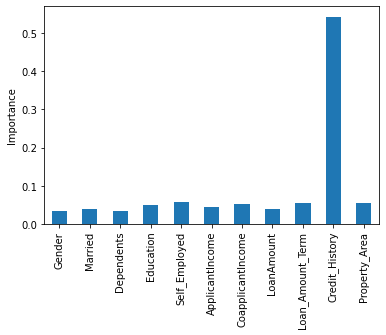

In [161]:
importance = XGB_model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

#### Hyperparamter Tuning

Same as GBDT

1. **n_estimators:** Total number of trees
2. **learning_rate:**This determines the impact of each tree on the final outcome
3. **random_state:** The random number seed so that same random numbers are generated every time
4. **max_depth:** Maximum depth to which tree can grow (stopping criteria)
5. **subsample:** The fraction of observations to be selected for each tree. Selection is done by random sampling
6. **objective:** Defines Loss function (*binary:logistic* is for classification using probability, *reg:logistic* is for classification, *reg:linear* is for regression)
7. **colsample_bylevel:** Random feature selection at levels
8. **colsample_bytree:** Random feature selection at tree

In [85]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [86]:
XGB_CV = XGBClassifier()
parameters = {
    'n_estimators': [5, 10, 25, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None],
    'colsample_bytree' : [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45] 
    
}

XGB_CV = GridSearchCV(XGB_CV, parameters, cv=5)
XGB_CV.fit(X_train, y_train.values.ravel())

print_results(XGB_CV)

BEST PARAMS: {'colsample_bytree': 0.2, 'max_depth': 2, 'n_estimators': 10}

0.783 (+/-0.027) for {'colsample_bytree': 0.1, 'max_depth': 2, 'n_estimators': 5}
0.753 (+/-0.037) for {'colsample_bytree': 0.1, 'max_depth': 2, 'n_estimators': 10}
0.748 (+/-0.026) for {'colsample_bytree': 0.1, 'max_depth': 2, 'n_estimators': 25}
0.725 (+/-0.049) for {'colsample_bytree': 0.1, 'max_depth': 2, 'n_estimators': 50}
0.772 (+/-0.055) for {'colsample_bytree': 0.1, 'max_depth': 2, 'n_estimators': 250}
0.786 (+/-0.031) for {'colsample_bytree': 0.1, 'max_depth': 4, 'n_estimators': 5}
0.737 (+/-0.056) for {'colsample_bytree': 0.1, 'max_depth': 4, 'n_estimators': 10}
0.739 (+/-0.072) for {'colsample_bytree': 0.1, 'max_depth': 4, 'n_estimators': 25}
0.711 (+/-0.064) for {'colsample_bytree': 0.1, 'max_depth': 4, 'n_estimators': 50}
0.741 (+/-0.066) for {'colsample_bytree': 0.1, 'max_depth': 4, 'n_estimators': 250}
0.779 (+/-0.02) for {'colsample_bytree': 0.1, 'max_depth': 8, 'n_estimators': 5}
0.744 (+/-0.0

In [87]:
XGB_CV.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [88]:
XGB_CV_model = XGB_CV.fit(X_train, y_train.values.ravel())

In [89]:
XGB_CV_model.score(X_train, y_train)

0.8275058275058275

In [90]:
XGB_CV_model.score(X_val, y_val)

0.7934782608695652

### Step 5 (Summary) : Compare model results and final model selection

In this section, we will:
1. Evaluate all of our saved models on the validation set
2. Select the best model based on performance on the validation set
3. Evaluate that model on the holdout test set

In [91]:
import joblib
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [92]:
joblib.dump(DT_CV_model.best_estimator_, 'DT_CV_model.pkl')

['DT_CV_model.pkl']

In [93]:
joblib.dump(LR_CV_model.best_estimator_, 'LR_CV_model.pkl')

['LR_CV_model.pkl']

In [94]:
joblib.dump(LR_CV_model.best_estimator_, 'SVM_CV_model.pkl')

['SVM_CV_model.pkl']

In [95]:
joblib.dump(RF_CV_model.best_estimator_, 'RF_CV_model.pkl')

['RF_CV_model.pkl']

In [96]:
joblib.dump(XGB_CV_model.best_estimator_, 'XGB_CV_model.pkl')

['XGB_CV_model.pkl']

In [97]:
models = {}

for mdl in ['DT_CV_model', 'LR_CV_model', 'SVM_CV_model', 'RF_CV_model', 'XGB_CV_model']:
    models[mdl] = joblib.load('{}.pkl'.format(mdl))

In [98]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3),
    f1 = round(f1_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / F1_score: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   f1,
                                                                                        round((end - start)*1000, 1)))

##### Evaluate models on the train set

In [99]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_train, y_train)

DT_CV_model -- Accuracy: 0.832 / Precision: 0.814 / Recall: (0.98,) / F1_score: 0.889 / Latency: 11.5ms
LR_CV_model -- Accuracy: 0.832 / Precision: 0.811 / Recall: (0.986,) / F1_score: 0.89 / Latency: 3.0ms
SVM_CV_model -- Accuracy: 0.832 / Precision: 0.811 / Recall: (0.986,) / F1_score: 0.89 / Latency: 9.0ms
RF_CV_model -- Accuracy: 0.834 / Precision: 0.811 / Recall: (0.99,) / F1_score: 0.892 / Latency: 81.7ms
XGB_CV_model -- Accuracy: 0.828 / Precision: 0.806 / Recall: (0.986,) / F1_score: 0.887 / Latency: 6.6ms


##### Evaluate models on the validation set

In [100]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

DT_CV_model -- Accuracy: 0.793 / Precision: 0.789 / Recall: (0.952,) / F1_score: 0.863 / Latency: 7.1ms
LR_CV_model -- Accuracy: 0.793 / Precision: 0.782 / Recall: (0.968,) / F1_score: 0.865 / Latency: 0.0ms
SVM_CV_model -- Accuracy: 0.793 / Precision: 0.782 / Recall: (0.968,) / F1_score: 0.865 / Latency: 1.9ms
RF_CV_model -- Accuracy: 0.793 / Precision: 0.782 / Recall: (0.968,) / F1_score: 0.865 / Latency: 62.5ms
XGB_CV_model -- Accuracy: 0.793 / Precision: 0.782 / Recall: (0.968,) / F1_score: 0.865 / Latency: 1.0ms


##### Evaluate models on the test set

In [101]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_test, y_test)

DT_CV_model -- Accuracy: 0.731 / Precision: 0.729 / Recall: (0.969,) / F1_score: 0.832 / Latency: 2.0ms
LR_CV_model -- Accuracy: 0.742 / Precision: 0.733 / Recall: (0.984,) / F1_score: 0.84 / Latency: 2.8ms
SVM_CV_model -- Accuracy: 0.742 / Precision: 0.733 / Recall: (0.984,) / F1_score: 0.84 / Latency: 0.0ms
RF_CV_model -- Accuracy: 0.731 / Precision: 0.729 / Recall: (0.969,) / F1_score: 0.832 / Latency: 72.9ms
XGB_CV_model -- Accuracy: 0.742 / Precision: 0.733 / Recall: (0.984,) / F1_score: 0.84 / Latency: 3.3ms


#### Plot ROC curve with predict_proba & roc_curve

In [ ]:
#logistic regression by default outputs probabilities.
#SVM's default output is binary (-1, 1) which is given by the design of the algorithm itself 
#finding the best separating hyperplane and either the target is on one side or the other.

In [154]:
# If you want SVM to output probabilities, you need to specify probability=True when you are instantiating the SVC class.
SVM = SVC(probability=True)
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.1, 1, 10]
}

SVM_CV = GridSearchCV(SVM, parameters, cv=5)
SVM_CV.fit(X_train, y_train.values.ravel())

print_results(SVM_CV)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.688 (+/-0.006) for {'C': 0.01, 'kernel': 'linear'}
0.688 (+/-0.006) for {'C': 0.01, 'kernel': 'rbf'}
0.828 (+/-0.039) for {'C': 0.1, 'kernel': 'linear'}
0.821 (+/-0.037) for {'C': 0.1, 'kernel': 'rbf'}
0.828 (+/-0.039) for {'C': 1, 'kernel': 'linear'}
0.828 (+/-0.039) for {'C': 1, 'kernel': 'rbf'}
0.828 (+/-0.039) for {'C': 10, 'kernel': 'linear'}
0.797 (+/-0.1) for {'C': 10, 'kernel': 'rbf'}


In [155]:
SVM_CV_model = SVM_CV.fit(X_train, y_train.values.ravel())

In [158]:
from sklearn.metrics import roc_curve

y_pred_prob1 = DT_CV_model.predict_proba(X_val)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_val, y_pred_prob1)

y_pred_prob2 = LR_CV_model.predict_proba(X_val)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_val, y_pred_prob2)

y_pred_prob3 = SVM_CV_model.predict_proba(X_val)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_val, y_pred_prob3)

y_pred_prob4 = RF_CV_model.predict_proba(X_val)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_val, y_pred_prob4)

y_pred_prob5 = XGB_CV_model.predict_proba(X_val)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_val, y_pred_prob5)

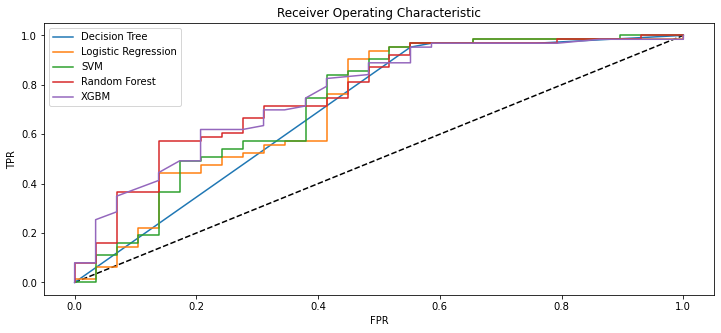

In [160]:
plt.figure(figsize=(12,5))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "SVM")
plt.plot(fpr4, tpr4, label= "Random Forest")
plt.plot(fpr5, tpr5, label= "XGBM")
# plt.plot(fpr4, tpr4, label= "Sigmoid")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()